<a href="https://colab.research.google.com/github/SnoorSalihi/Customer-Dataset-Analysis/blob/main/DATA_VISUALIZATION_USING_TOOLS_Group_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Dataset

#Importing nessary libraries and Loading the Data set

In [2]:
#Import standard libraries
import pandas as pd
import numpy as np
#libraries For ploting
import seaborn as sns
import matplotlib.pyplot as plt
# use the inline backend to generate the plots within the browser
%matplotlib inline
import matplotlib as mpl
from wordcloud import WordCloud
!pip install pywaffle
from pywaffle import Waffle


mpl.style.use('ggplot')  # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 55.3 MB/s eta 0:00:00
Matplotlib version:  3.7.1


##Loading the Data

In [3]:
# Loading the dataset from CSV file
data=pd.read_csv('/content/Customers.csv')
data.head(2)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3


#Data Wrangling

In [4]:
#detect missing data
missing_data = data.isnull()
missing_data.head(2)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False


In [5]:
#Count missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

CustomerID
False    2000
Name: CustomerID, dtype: int64

Gender
False    2000
Name: Gender, dtype: int64

Age
False    2000
Name: Age, dtype: int64

Annual Income ($)
False    2000
Name: Annual Income ($), dtype: int64

Spending Score (1-100)
False    2000
Name: Spending Score (1-100), dtype: int64

Profession
False    1965
True       35
Name: Profession, dtype: int64

Work Experience
False    2000
Name: Work Experience, dtype: int64

Family Size
False    2000
Name: Family Size, dtype: int64



##Dealing with Missing Value
Since we have only missing value in Proffession column and its type is object we will replace it with Not Known

In [6]:
#First replace empty cell with NaN
data.replace(r'^\s*$', np.nan, regex=True)


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [7]:
#Second replace the missing 'Proffession' values by Not Known 
data["Profession"].replace(np.nan, "Not Known", inplace=True)

#Exploratory Data Analysis

In [8]:
# look at the info of "df"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              2000 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [9]:
#Find the name of the columns 
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [10]:
# check the data type of data frame "data" by .dtypes
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

In [11]:
#checking the null value in the dataset
data.isna().sum()/len(data)

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income ($)         0.0
Spending Score (1-100)    0.0
Profession                0.0
Work Experience           0.0
Family Size               0.0
dtype: float64

In [12]:
#discover statistical summary of each column
data.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


##Analyzing Individual Feature Patterns Using Visualization

(0.0, 105.0)

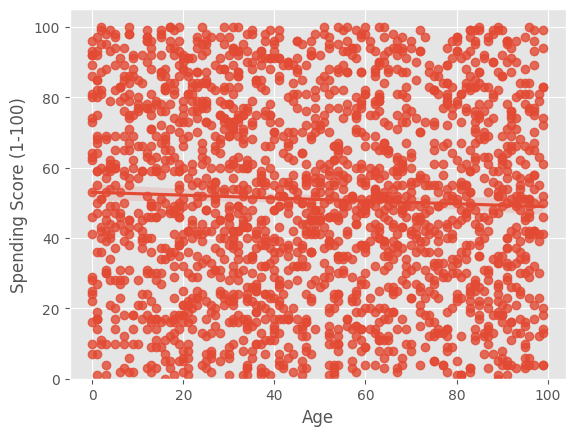

In [13]:
# Age as potential predictor variable of Spending Score
sns.regplot(x="Age", y="Spending Score (1-100)", data=data)
plt.ylim(0,)

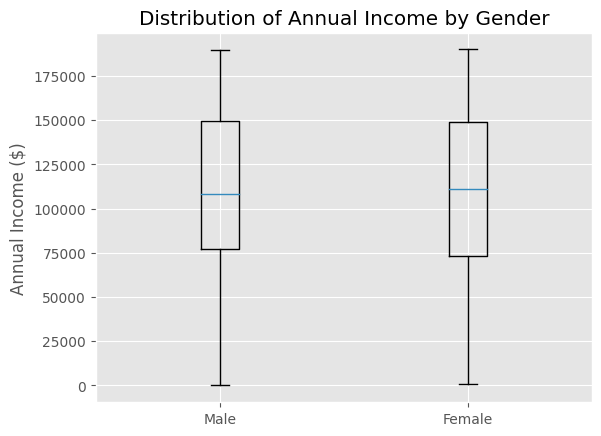

In [14]:
# Create a box plot to compare the distribution of annual income by gender
plt.boxplot([data[data['Gender']=='Male']['Annual Income ($)'], data[data['Gender']=='Female']['Annual Income ($)']])
plt.xticks([1, 2], ['Male', 'Female'])
plt.ylabel('Annual Income ($)')
plt.title('Distribution of Annual Income by Gender')
plt.show()

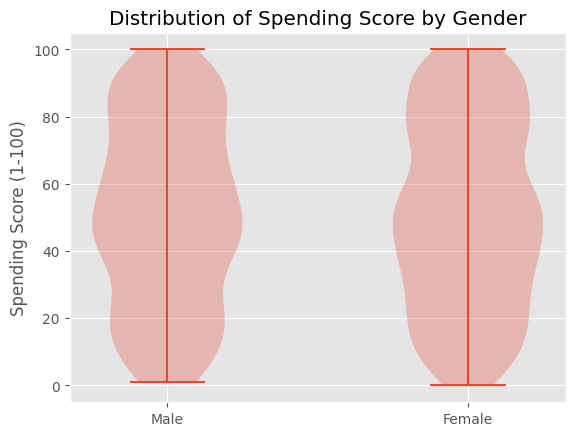

In [15]:
# Create a violin plot to compare the distribution of spending score by gender
plt.violinplot([data[data['Gender']=='Male']['Spending Score (1-100)'], data[data['Gender']=='Female']['Spending Score (1-100)']])
plt.xticks([1, 2], ['Male', 'Female'])
plt.ylabel('Spending Score (1-100)')
plt.title('Distribution of Spending Score by Gender')
plt.show()

(0.0, 105.0)

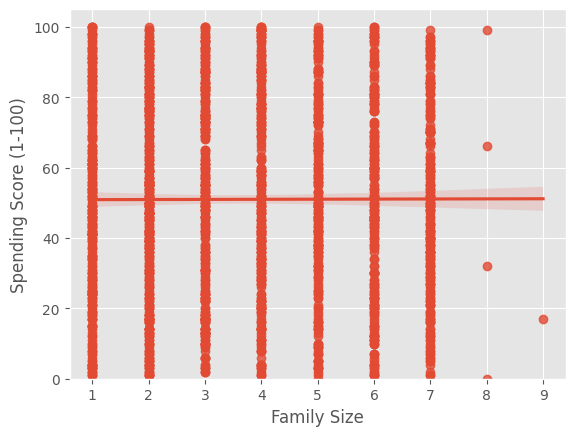

In [16]:
# Family Size as potential predictor variable of Spending Score
sns.regplot(x="Family Size",y="Spending Score (1-100)", data=data)
plt.ylim(0,)

<Axes: xlabel='Annual Income ($)', ylabel='Profession'>

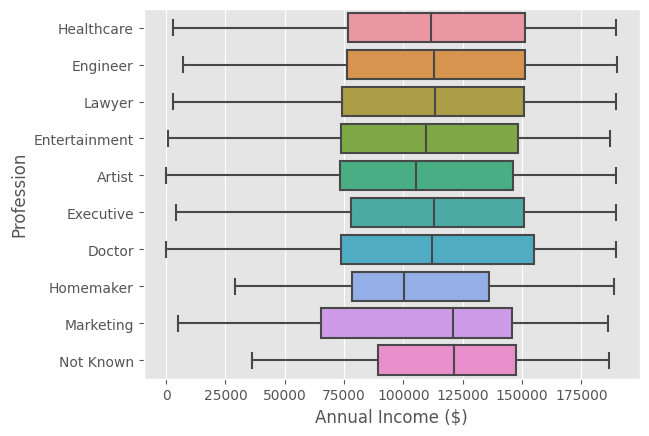

In [18]:
#
sns.boxplot(x="Annual Income ($)",y="Profession", data=data)

In [19]:
#The default setting of "describe" skips variables of type object. 
#We can apply the method "describe" on the variables of type 'object' as follows:
data.describe(include=['object'])

,Gender,Profession
count,2000,2000
unique,2,10
top,Female,Artist
freq,1186,612


#Data Visualization

##Pie chart using Matplotlib

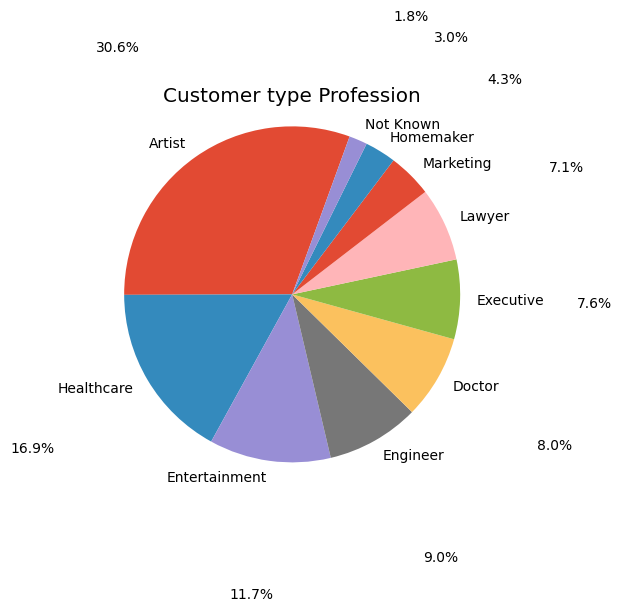

In [20]:
# Extract data for pie chart

labels = data['Profession'].value_counts().index.tolist()
sizes = data['Profession'].value_counts().tolist()

# Create pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=70,pctdistance=1.80)
plt.title('Customer type Profession')
ax1.axis('equal')

# Show chart
plt.show()

In [21]:
data1 = data.groupby('Profession', axis=0).sum()
data1



<ipython-input-21-5ad5b0e31032>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1 = data.groupby('Profession', axis=0).sum()


,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
Profession,,,,,,
Artist,608349,29991,66571267,32239,2580,2236
Doctor,162702,7506,17963288,8356,693,591
Engineer,167489,9862,19897862,8765,708,641
Entertainment,248313,11972,25892178,12388,819,910
Executive,164055,7130,17406830,7635,650,607
Healthcare,329127,16219,38162600,17125,1357,1324
Homemaker,61375,2722,6525517,2783,368,243
Lawyer,135951,6781,15761409,6938,501,514
Marketing,88248,3895,9179508,4141,366,317


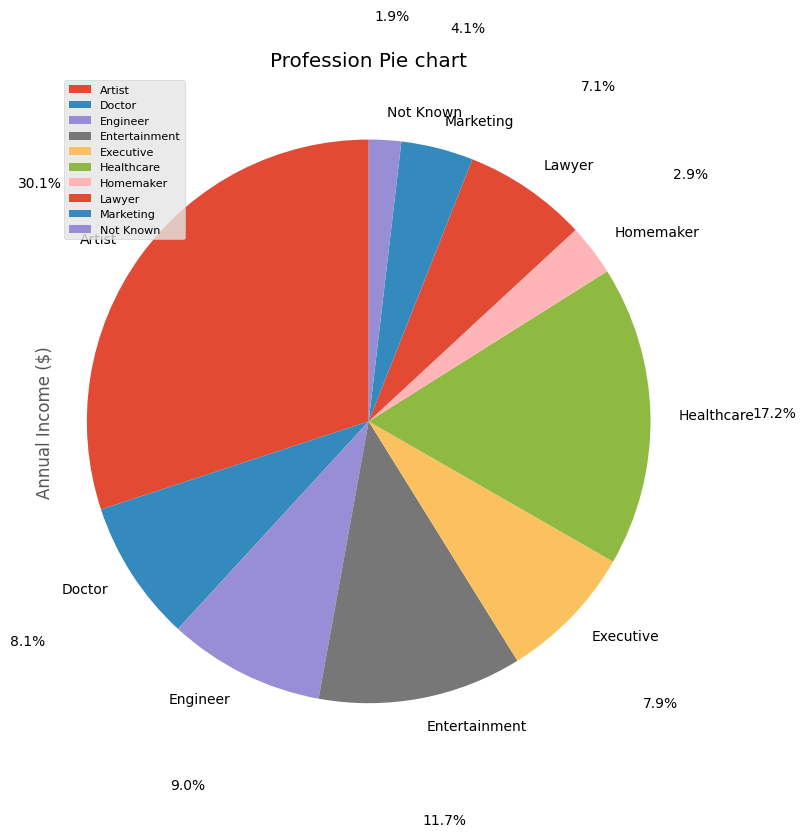

In [22]:
#pie chart

data1['Annual Income ($)'].plot(kind='pie',
          figsize=(8, 9),
          autopct='%1.1f%%', # add in percentages
          startangle=90,     # start angle 90° (Africa)
          subplots=True, 
          pctdistance=1.44,
         
          )
plt.title('Profession Pie chart')  # Set chart title
plt.axis('equal')  # Set axis properties
plt.legend(labels=data1.index, loc='upper left',fontsize=8) 
plt.show()

**  PIE CHART USING SEABORN **

In [23]:
data1=data.groupby(by='Work Experience')
data1

data_mean = data1.mean()
data_mean



<ipython-input-23-fccc0a5299d4>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_mean = data1.mean()


,CustomerID,Age,Annual Income ($),Spending Score (1-100),Family Size
Work Experience,,,,,
0,943.410673,50.893271,106117.547564,51.262181,3.786543
1,902.640426,47.510638,107656.927660,50.855319,3.691489
2,717.666667,47.428571,105747.650794,55.984127,3.555556
3,779.963636,46.618182,114020.618182,58.363636,3.672727
4,1126.371901,52.685950,113905.644628,50.347107,3.834711
5,1124.094017,50.487179,106230.470085,48.905983,3.803419
6,1132.050000,45.300000,117741.191667,55.000000,3.783333
7,1187.857143,50.301587,111330.817460,50.047619,4.023810
8,1093.542169,46.054217,115476.180723,50.765060,3.614458


Pie chart using Plotly

In [24]:
import plotly.graph_objects as go
import pandas as pd

 

# Group the data by work experience
data_grouped = data.groupby(by='Work Experience')

# Calculate the mean work experience for each group
data_mean = data_grouped.mean()
data_mean


labels = data_mean['Spending Score (1-100)']
values = data_mean['Age']

# Create the pie chart using Plotly
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Set the title of the chart
fig.update_layout(title='Mean work experience by age')

# Show the chart
fig.show()


<ipython-input-24-68600d121d2a>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_mean = data_grouped.mean()


## Waffle Charts

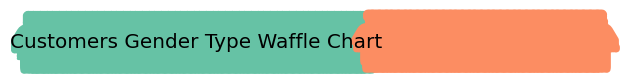

In [25]:
# 
Gender_data = data[['Gender']]
value = Gender_data.value_counts()

#store each Gender type and its count in a dictionary 
value_dict = value.to_list() 


# Create a Waffle chart
plt.figure(
    FigureClass = Waffle,
    rows = 6,
    values = value,
    icons=['female', 'male'],
    title = {'label':'Customers Gender Type Waffle Chart',
             'loc': 'left'},
    legend={
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.4),
        'ncol': len(data),
        'framealpha': 0,
        'fontsize': 6
    }), 


plt.show()

##BarChart

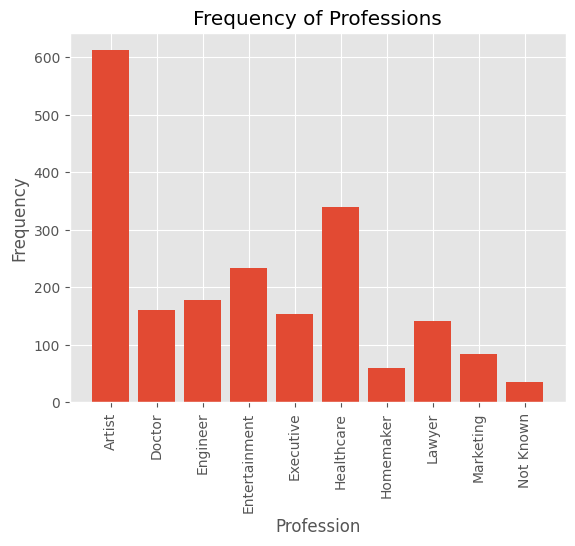

In [28]:
# Group the data by profession and count the number of occurrences of each profession
profession_counts = data.groupby('Profession')['CustomerID'].count()

# Create a bar chart
plt.bar(profession_counts.index, profession_counts.values)

# Set the title and labels
plt.title('Frequency of Professions')
plt.xlabel('Profession')
plt.ylabel('Frequency')
# Rotate the x-axis labels to appear horizontally
plt.xticks(rotation=90)
# Show the plot
plt.show()

##Scatter Plot

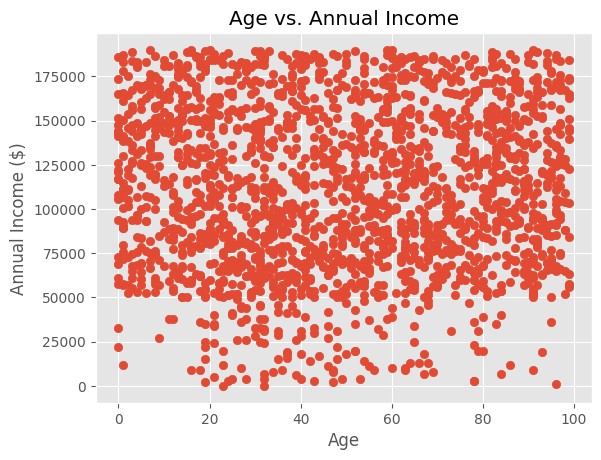

In [29]:
# Create a scatter plot to show the relationship between age and annual income
plt.scatter(data['Age'], data['Annual Income ($)'])

# Set the title and labels
plt.title('Age vs. Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income ($)')

# Show the plot
plt.show()

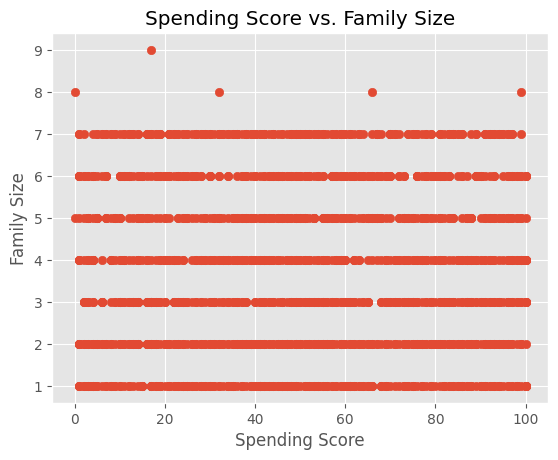

In [30]:
# Create a scatter plot to show the relationship between spending score and family size
plt.scatter(data['Spending Score (1-100)'], data['Family Size'])

# Set the title and labels
plt.title('Spending Score vs. Family Size')
plt.xlabel('Spending Score')
plt.ylabel('Family Size')

# Show the plot
plt.show()

##Box Plot

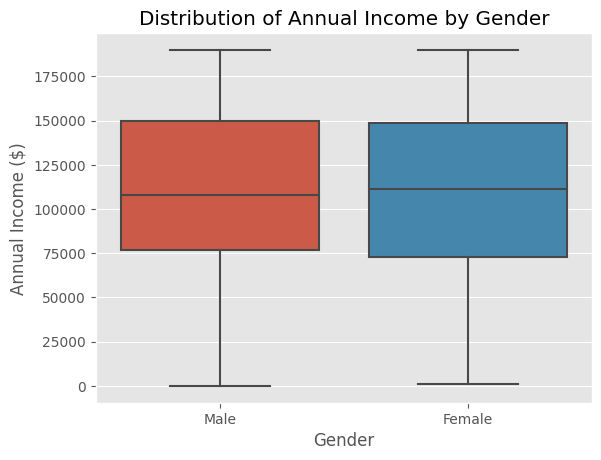

In [31]:
# Create a box plot to show the distribution of annual income for males and females
sns.boxplot(x='Gender', y='Annual Income ($)', data=data)

# Set the title and labels
plt.title('Distribution of Annual Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income ($)')

# Show the plot
plt.show()

##Histogram 

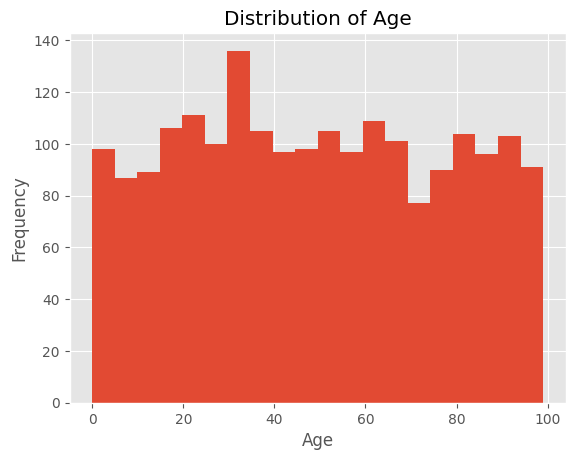

In [32]:
# Create a histogram to show the distribution of age
plt.hist(data['Age'], bins=20)

# Set the title and labels
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

##Heatmap

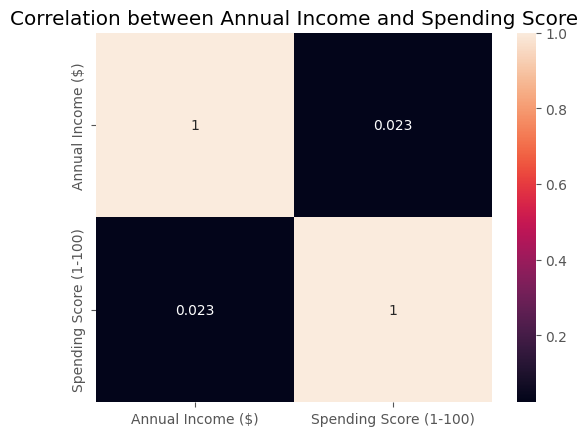

In [33]:
# Create a heatmap to show the correlation between annual income and spending score
sns.heatmap(data[['Annual Income ($)', 'Spending Score (1-100)']].corr(), annot=True)

# Set the title
plt.title('Correlation between Annual Income and Spending Score')

# Show the plot
plt.show()

##Generating a Word Cloud


In [34]:
#Find the unique value in Profession
data['Profession'].value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Not Known         35
Name: Profession, dtype: int64

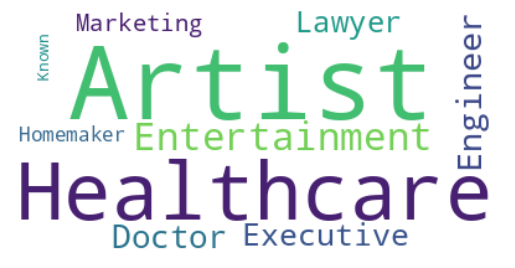

In [35]:
#Creating the text variable
text = " ".join(pro for pro in data['Profession'])

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Summery


In this project we have used the Customer dataset from kaggle. The customer dataset consists of data on customers of a retail store. The dataset contains 2000 rows and 8 columns. The columns include customer ID, gender, age, annual income, spending score, profession, work experience, and family size. 

This dataset was collected for the purpose of analyzing customer behavior and preferences, and to identify patterns in customer spending habits.

By analyzing this dataset, we can gain insights into customer behavior and preferences, and identify trends in customer spending habits. The dataset can be used to develop targeted marketing strategies and improve customer satisfaction.

